<a href="https://colab.research.google.com/github/jonahcoutinho/Machine-Learning/blob/main/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Naive bayes theorm uses bayes theorm for conditional probability with a naive assumption that the features are not correlated to each other and tries to find conditional probability of target variable given the probabilities of features. We will use titanic survival dataset here and using naive bayes classifier find out the survival probability of titanic travellers. We use sklearn library and python for this beginners machine learning tutorial. GaussianNB is the classifier we use to train our model. 

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

In [44]:
df=pd.read_csv('/content/titanic.csv')

In [45]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [46]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [47]:
df.drop(['PassengerId', 'Name',  'SibSp', 'Parch','Ticket','Cabin', 'Embarked'],axis='columns',inplace=True)

In [48]:
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [49]:
target=df.Survived
input=df.drop('Survived',axis='columns')

In [50]:
input.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [51]:
#sex has to be made into dummies

dummies=pd.get_dummies(input.Sex)
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [52]:
#great now we can add this to inputs , drop sex and drop any one
input=pd.concat([input,dummies],axis='columns')

In [53]:
input.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
female      0
male        0
dtype: int64

Here we see that there are 177 null age entries.
Lets fill them with mean

In [54]:
input.Age.fillna(input.Age.mean(),inplace=True)

In [55]:
input.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
female    0
male      0
dtype: int64

Great!

In [88]:
input=input.drop(['Sex'],axis='columns')

KeyError: ignored

In [149]:
xtrain,xtest,ytrain,ytest=train_test_split(input,target,test_size=0.2)

In [150]:
xtrain.shape

(712, 5)

In [151]:
xtest.shape

(179, 5)

In [152]:
input

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
...,...,...,...,...,...
886,2,27.000000,13.0000,0,1
887,1,19.000000,30.0000,1,0
888,3,29.699118,23.4500,1,0
889,1,26.000000,30.0000,0,1


In [153]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB(var_smoothing=1e-09)
model.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
model.score(xtest,ytest)

0.8100558659217877

Now we know this model has a probability attribute

In [155]:
pred=model.predict(xtest)

In [156]:
model.predict_proba(xtest)

array([[8.32175457e-02, 9.16782454e-01],
       [3.93253845e-02, 9.60674616e-01],
       [9.88999917e-01, 1.10000833e-02],
       [3.84810186e-02, 9.61518981e-01],
       [3.63162142e-02, 9.63683786e-01],
       [3.75814598e-02, 9.62418540e-01],
       [6.98392810e-01, 3.01607190e-01],
       [6.58748484e-02, 9.34125152e-01],
       [9.90697833e-01, 9.30216698e-03],
       [9.90396926e-01, 9.60307441e-03],
       [8.46574906e-01, 1.53425094e-01],
       [9.90396926e-01, 9.60307441e-03],
       [9.55291080e-01, 4.47089200e-02],
       [9.90162571e-01, 9.83742905e-03],
       [1.57792856e-05, 9.99984221e-01],
       [9.76469645e-01, 2.35303547e-02],
       [9.90697833e-01, 9.30216698e-03],
       [9.90540297e-01, 9.45970312e-03],
       [9.90565827e-01, 9.43417316e-03],
       [8.63935640e-02, 9.13606436e-01],
       [9.88341233e-01, 1.16587670e-02],
       [9.89823820e-01, 1.01761800e-02],
       [4.14358838e-04, 9.99585641e-01],
       [4.61488139e-02, 9.53851186e-01],
       [8.841397

In [157]:
cm=confusion_matrix(pred,ytest)

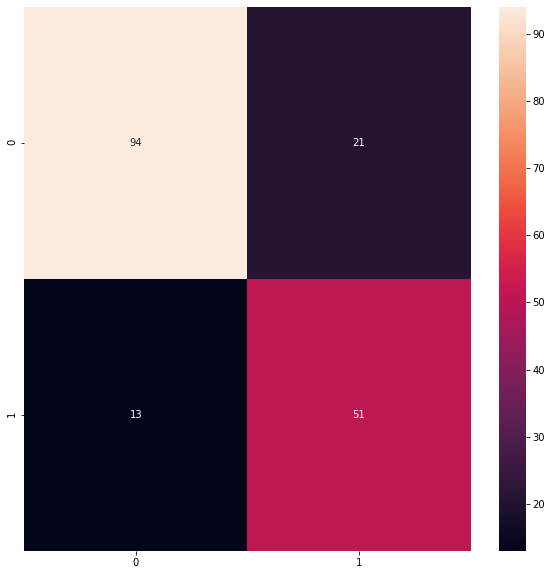

In [158]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

In [159]:
# so we have 34 mis classfied entries
